CSV loaded with 569 rows and 33 columns.
Dropped 'Unnamed: 32' column.
Explained variance ratio (2 components): 0.632


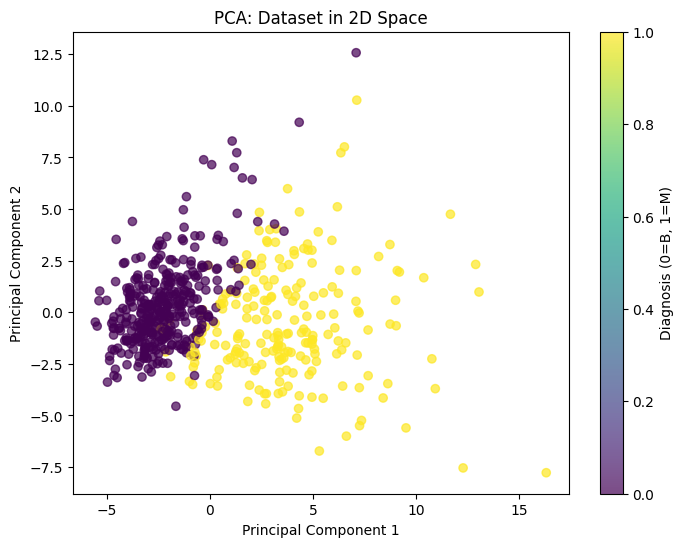

Interpretation: Clear separation between classes in reduced space indicates PCA captures discriminative variance effectively.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load CSV
data_dir = "/content/data"
csv_path = f"{data_dir}/Breast_cancer_dataset.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}")

labels_df = pd.read_csv(csv_path)
print(f"CSV loaded with {labels_df.shape[0]} rows and {labels_df.shape[1]} columns.")

# Drop useless empty column if present
if "Unnamed: 32" in labels_df.columns:
    labels_df = labels_df.drop(columns=["Unnamed: 32"])
    print("Dropped 'Unnamed: 32' column.")

# Encode target
le = LabelEncoder()
y = le.fit_transform(labels_df['diagnosis'])

# Drop non-feature columns
X = labels_df.drop(columns=['id', 'diagnosis'], errors='ignore')

# Handle missing values (replace with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Explained variance ratio (2 components): {explained_variance:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: Dataset in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Diagnosis (0=B, 1=M)')
plt.show()

print("Interpretation: Clear separation between classes in reduced space indicates PCA captures discriminative variance effectively.")
